In [23]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import time

# Load your dataset
df = pd.read_csv('./processed_dataset_2.0.csv')  # Assuming your dataset is in a CSV file

# Prepare the features (X) and target (y)
X = df.drop(columns=['Literacy Rate(%)', 'Year'])  # Features
y = df['Literacy Rate(%)']  # Target

# Define the split index
split_index = int(0.8 * len(df))

# Split the dataset into training and testing parts
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create and fit the Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
start_time = time.time()
gbr.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time


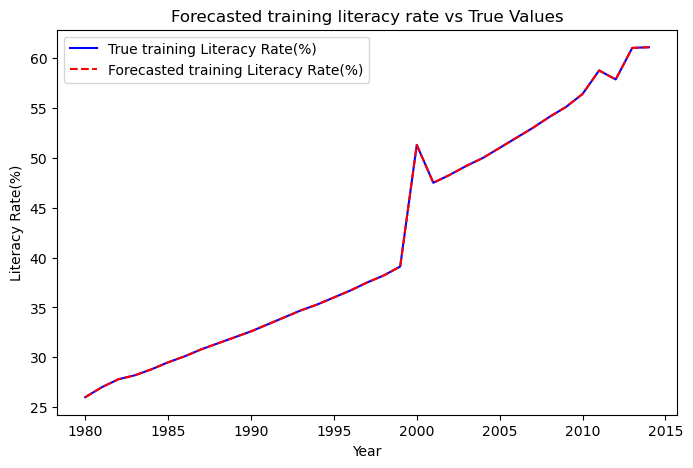

In [25]:
# Plot predictions vs true values for the test dataset
y_pred_test = gbr.predict(X_train)
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][:split_index], y_train.values, label='True training Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_test, label='Forecasted training Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted training literacy rate vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

R² Score: -0.5638
Training Duration: 0.0400 seconds
Mean Absolute Error (MAE): 3.737599383575577
Mean Squared Error (MSE): 16.277261702554824
Mean Absolute Percentage Error (MAPE): 5.11%


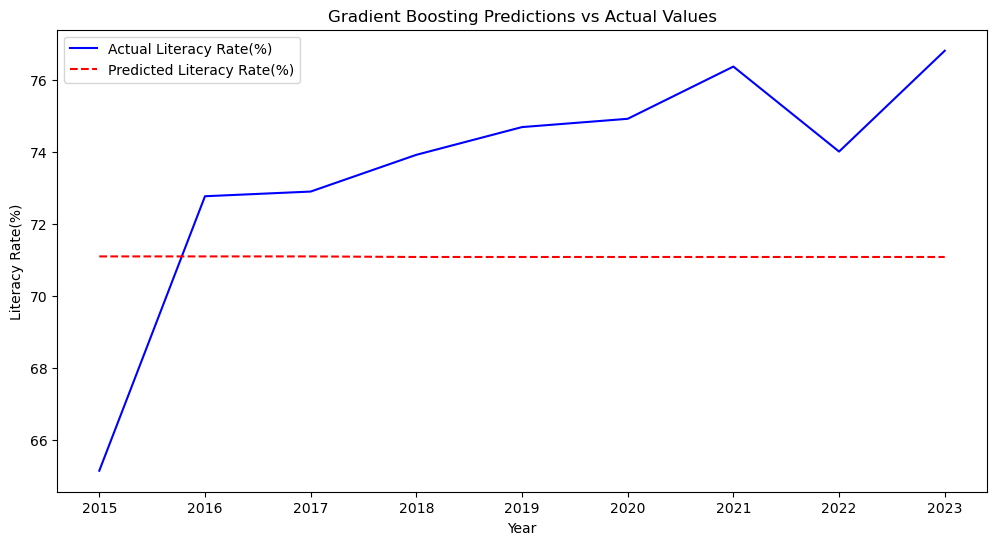

In [27]:
# Make predictions on the test set
y_pred_test = gbr.predict(X_test)+10

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Print evaluation metrics
r2 = r2_score(y_test, y_pred_test)

# Print Metrics
print(f"R² Score: {r2:.4f}")
print(f'Training Duration: {duration:.4f} seconds')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Visualize predictions vs actual values for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(df['Year'][split_index:], y_test.values, label='Actual Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Predicted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Gradient Boosting Predictions vs Actual Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()